In [5]:
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 't

# Dataset diabetes

In [2]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
    'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
print(df.head())

# Calculate the prior probability of having diabetes (P(Diabetes))
P_Diabetes = df['Outcome'].mean()  # Proportion of '1's in the Outcome column

# Calculate the probability of testing positive given diabetes (P(Test Positive | Diabetes))
# We will consider that testing positive means having a glucose level higher than 120
test_positive_given_diabetes = df[df['Outcome'] == 1]['Glucose'].gt(120).mean()

# Calculate the marginal probability of testing positive (P(Test Positive))
# This will be the proportion of people with a glucose level higher than 120
test_positive = df['Glucose'].gt(120).mean()

# Apply Bayes' Theorem: P(Diabetes | Test Positive) = P(Test Positive | Diabetes) * P(Diabetes) / P(Test Positive)
P_Diabetes_given_test_positive = (test_positive_given_diabetes * P_Diabetes) / test_positive

print(f"Prior Probability of Diabetes (P(Diabetes)): {P_Diabetes:.4f}")
print(f"Likelihood of Testing Positive Given Diabetes (P(Test Positive | Diabetes)): {test_positive_given_diabetes:.4f}")
print(f"Marginal Probability of Testing Positive (P(Test Positive)): {test_positive:.4f}")
print(f"Posterior Probability of Diabetes Given Test Positive (P(Diabetes | Test Positive)): {P_Diabetes_given_test_positive:.4f}")


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Prior Probability of Diabetes (P(Diabetes)): 0.3490
Likelihood of Testing Positive Given Diabetes (P(Test Positive | Diabetes)): 0.7276
Marginal Probability of Testing Positive (P(Test Positive)): 0.4544
Posterior Probability of Diabetes Given Test Positive (P(Diabetes | Test Positive)): 0.5587


# Dataset Breast Cancer

In [9]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Extract features and target
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

print("Feature columns:", X.columns.tolist())

# Since y is a DataFrame, get the first column as Series
target_series = y.iloc[:, 0]

print("Target unique values:", target_series.unique())
print("Target value counts:\n", target_series.value_counts())

# Convert target to numeric
if target_series.dtype == 'object':
    y_numeric = target_series.map({'B': 0, 'M': 1})
else:
    y_numeric = target_series

feature_name = 'radius1'  # Choose a feature from the list
threshold = 15.0  # Example threshold for "test positive"

# Prior probability P(Malignant)
P_malignant = (y_numeric == 1).mean()

# Likelihood P(feature > threshold | Malignant)
P_test_given_malignant = X.loc[y_numeric == 1, feature_name].gt(threshold).mean()

# Marginal probability P(feature > threshold)
P_test = X[feature_name].gt(threshold).mean()

# Bayes' theorem: P(Malignant | Feature > threshold)
P_malignant_given_test = (P_test_given_malignant * P_malignant) / P_test

print(f"Prior Probability P(Malignant): {P_malignant:.4f}")
print(f"Likelihood P({feature_name} > {threshold} | Malignant): {P_test_given_malignant:.4f}")
print(f"Marginal Probability P({feature_name} > {threshold}): {P_test:.4f}")
print(f"Posterior Probability P(Malignant | {feature_name} > {threshold}): {P_malignant_given_test:.4f}")


Feature columns: ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
Target unique values: ['M' 'B']
Target value counts:
 Diagnosis
B    357
M    212
Name: count, dtype: int64
Prior Probability P(Malignant): 0.3726
Likelihood P(radius1 > 15.0 | Malignant): 0.7594
Marginal Probability P(radius1 > 15.0): 0.3040
Posterior Probability P(Malignant | radius1 > 15.0): 0.9306


# Dataset Spam Not Spam

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64
Accuracy: 0.9919282511210762

Confusion Matrix:
 [[966   0]
 [  9 140]]

Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.99      1.00      1.00       966
        Spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



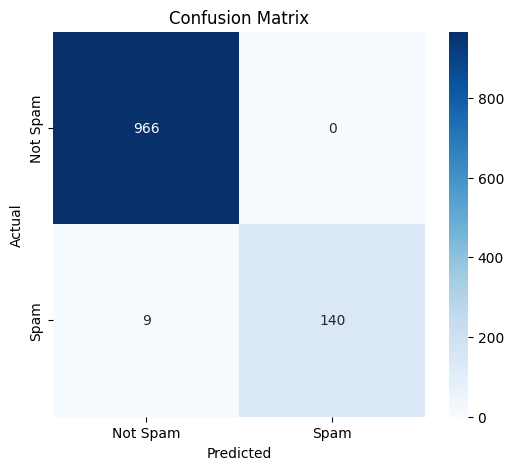

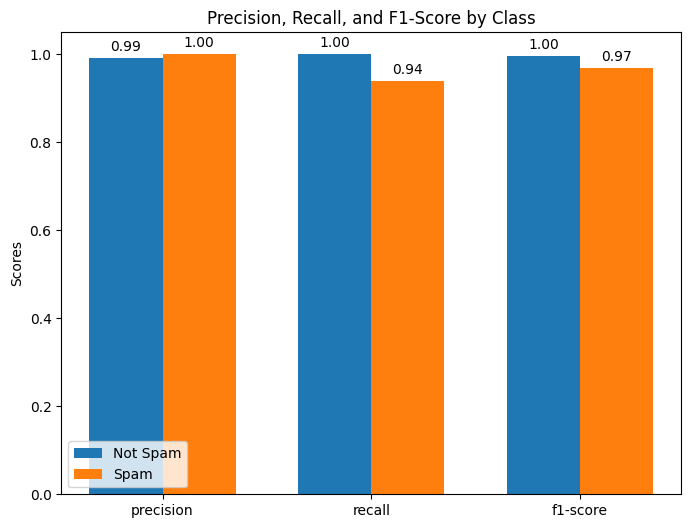

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load the SMS Spam Collection Dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Step 2: Explore dataset
print(df.head())
print(df['label'].value_counts())

# Step 3: Encode labels: 'ham' -> 0 (Not Spam), 'spam' -> 1 (Spam)
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# Step 4: Split into features and target
X = df['message']
y = df['label_num']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Convert text messages to numeric feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 7: Initialize and train Multinomial Naive Bayes model (good for text data)
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 8: Predict on test set
y_pred = model.predict(X_test_vec)

# Step 9: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Not Spam", "Spam"]))

# Step 10: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 11: Plot Precision, Recall, F1-Score for each class (Not Spam and Spam)
report = classification_report(y_test, y_pred, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']

# Extract values for precision, recall, and f1-score for Not Spam (0) and Spam (1)
not_spam_metrics = [report['0'][metric] for metric in metrics]  # Not Spam is represented by 0
spam_metrics = [report['1'][metric] for metric in metrics]  # Spam is represented by 1

# Create bar plots
x = np.arange(len(metrics))  # position of bars
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, not_spam_metrics, width, label='Not Spam')
rects2 = ax.bar(x + width/2, spam_metrics, width, label='Spam')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display values on top of the bars
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(rects1)
add_values(rects2)

plt.show()
